In [2]:
import numpy as np,matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.decomposition   import PCA
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
import pandas as pd

In [6]:
##read data from Office supplies CSV

df = pd.read_excel(r'C:\Users\bsamuel\Desktop\DS\Capstone\Office Supply Campaign ResultS 7-23-19.xlsx')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null float64
Historical Sales Volume              16172 non-null float64
Date of First Purchase               16172 non-null datetime64[ns]
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null float64
Do Not Email                         16172 non-null float64
Do Not Telemarket                    16172 non-null float64
Repurchase Method                    16172 non-null object
Last Transaction Channel             15730 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

In [4]:
df.columns=[col.strip().lower().replace(' ','_') for col in df.columns] 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
customer_number                      16172 non-null float64
campaign_period_sales                16172 non-null float64
historical_sales_volume              16172 non-null float64
date_of_first_purchase               16172 non-null datetime64[ns]
number_of_prior_year_transactions    16172 non-null float64
do_not_direct_mail_solicit           16172 non-null float64
do_not_email                         16172 non-null float64
do_not_telemarket                    16172 non-null float64
repurchase_method                    16172 non-null object
last_transaction_channel             15730 non-null object
desk                                 16173 non-null object
executive_chair                      16171 non-null object
standard_chair                       16171 non-null object
monitor                              16171 non-null object
printer                              16171 non-nul

In [5]:
df.drop(labels=16172,axis=0,inplace=True) # drop last row as it has all null values
idx_missing=df.loc[df.toner.isnull()].index
print(df.loc[idx_missing])
idx_missing_emp=df.loc[df.number_of_employees.isnull()].index
print(df.loc[idx_missing_emp])

       customer_number  campaign_period_sales  historical_sales_volume  \
3909         8793672.0                    0.0             3.604848e+05   
15468       52978373.0                    0.0             1.135111e+06   

      date_of_first_purchase  number_of_prior_year_transactions  \
3909              1990-08-15                                2.0   
15468             2007-10-30                                2.0   

       do_not_direct_mail_solicit  do_not_email  do_not_telemarket  \
3909                          0.0           0.0                0.0   
15468                         1.0           1.0                1.0   

      repurchase_method last_transaction_channel   ...    executive_chair  \
3909         AUTO RENEW                      WEB   ...                NaN   
15468            NOTICE                  BILLING   ...                  N   

      standard_chair monitor printer computer insurance toner office_supplies  \
3909             NaN     NaN     NaN        N      

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16172 entries, 0 to 16171
Data columns (total 21 columns):
customer_number                      16172 non-null float64
campaign_period_sales                16172 non-null float64
historical_sales_volume              16172 non-null float64
date_of_first_purchase               16172 non-null datetime64[ns]
number_of_prior_year_transactions    16172 non-null float64
do_not_direct_mail_solicit           16172 non-null float64
do_not_email                         16172 non-null float64
do_not_telemarket                    16172 non-null float64
repurchase_method                    16172 non-null object
last_transaction_channel             15730 non-null object
desk                                 16172 non-null object
executive_chair                      16171 non-null object
standard_chair                       16171 non-null object
monitor                              16171 non-null object
printer                              16171 non-nul

In [8]:
print(df.last_transaction_channel.value_counts())
print(df.number_of_employees.value_counts())

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: last_transaction_channel, dtype: int64
6-10       5230
           3746
1-5        2700
11-50      2236
51-100     1381
101-500     653
500+        224
Name: number_of_employees, dtype: int64


In [6]:
#df.drop(labels=df.loc[df.last_transaction_channel.isnull()].index,axis=0,inplace=True) # drop rows with missing entries on last transaction channel
df.last_transaction_channel[df.last_transaction_channel.isnull()]='NONE'
df.number_of_employees[df.number_of_employees.isnull()]='NONE'
df.number_of_employees[df.number_of_employees.str.contains(' ')]='NONE'

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

In [7]:
df.language[df.language.isnull()]='NONE' # convert blank values to 'NONE' for language column
df.language.value_counts()

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


English       11317
NONE           4471
Spanish          88
Italian          46
Portuguese       41
Hindi            40
Chinese          34
Russian          24
Hebrew           20
Arabic           18
German           15
Greek            15
Japanese         11
Polish           10
Vietnamese        9
French            6
Korean            4
Thai              2
Pashto            1
Name: language, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16172 entries, 0 to 16171
Data columns (total 21 columns):
customer_number                      16172 non-null float64
campaign_period_sales                16172 non-null float64
historical_sales_volume              16172 non-null float64
date_of_first_purchase               16172 non-null datetime64[ns]
number_of_prior_year_transactions    16172 non-null float64
do_not_direct_mail_solicit           16172 non-null float64
do_not_email                         16172 non-null float64
do_not_telemarket                    16172 non-null float64
repurchase_method                    16172 non-null object
last_transaction_channel             16172 non-null object
desk                                 16172 non-null object
executive_chair                      16171 non-null object
standard_chair                       16171 non-null object
monitor                              16171 non-null object
printer                              16171 non-nul

In [18]:
df.describe()

,customer_number,campaign_period_sales,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,num_emp
count,1.617200e+04,16172.000000,1.617200e+04,16172.000000,16172.000000,16172.000000,16172.000000,12424.000000
mean,2.070406e+07,245.896967,6.716763e+05,14.483119,0.107841,0.211848,0.097638,41.638361
std,1.898585e+07,720.317450,9.566271e+05,8.031293,0.310189,0.408630,0.296834,90.946748
min,8.673400e+04,-566.500000,-1.643031e+05,1.000000,0.000000,0.000000,0.000000,3.000000
25%,9.100472e+06,0.000000,1.900188e+05,8.000000,0.000000,0.000000,0.000000,8.000000
50%,1.807196e+07,0.000000,3.965039e+05,16.000000,0.000000,0.000000,0.000000,8.000000
75%,2.712137e+07,145.669048,7.876159e+05,20.000000,0.000000,0.000000,0.000000,25.000000
max,1.672359e+08,8936.850000,3.441213e+07,313.000000,1.000000,1.000000,1.000000,500.000000


In [242]:
#df.loc[df.campaign_period_sales<0] # to drop
df.drop(labels=df.loc[df.campaign_period_sales<0].index,axis=0,inplace=True)

In [13]:
df.drop(labels=df.loc[df.number_of_prior_year_transactions>40].index,inplace=True) # to drop outliers in number of prior transactions

In [15]:
df.loc[df.campaign_period_sales<0]

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
5783,12970830.0,-119.333333,69223.560000,1972-04-15,5.0,1.0,1.0,1.0,NOTICE,WEB,N,N,N,N,N,N,N,N,N,NONE,NONE
5919,13276523.0,-140.960000,500408.000000,1976-10-15,25.0,0.0,1.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
6135,13753769.0,-14.320000,24057.600000,1969-01-01,20.0,0.0,0.0,0.0,NOTICE,WEB,N,N,N,N,N,N,N,N,Y,1-5,English
10689,23849132.0,-421.833333,13543.210000,2006-05-15,3.0,1.0,1.0,1.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,NONE,NONE
11934,26677728.0,-161.166667,27398.333333,1993-01-15,10.0,0.0,1.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,NONE,NONE
15840,56184607.0,-566.500000,48152.670000,2014-10-31,1.0,1.0,1.0,1.0,NOTICE,WEB,N,N,N,N,N,N,N,N,N,NONE,NONE


In [16]:
df.loc[df.duplicated(['customer_number'])] # no duplicate customer records

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,...,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language


In [8]:
def convert_fill_num_emp(val):
    if val=='1-5':return 3
    if val=='6-10':return 8 
    if val=='11-50':return 25
    if val=='51-100':return 75
    if val=='101-500':return 300
    if val=='500+':return 500
    else: return np.nan
    

In [9]:
df['num_emp']=df['number_of_employees'].apply(convert_fill_num_emp)

In [10]:
#df['num_emp'].median()
df.num_emp[df['num_emp'].isna()]=8
df['num_emp']=df.num_emp.astype(int)

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df.desk[df.desk=='YY']='Y'
df.computer[df.computer=='YY']='Y'
df.insurance[df.insurance=='YY']='Y'
df.toner[df.toner=='YY']='Y'


C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from

In [12]:
print(df.desk.value_counts())
print(df.executive_chair.value_counts())
print(df.standard_chair.value_counts())
print(df.monitor.value_counts())
print(df.printer.value_counts())
print(df.computer.value_counts())
print(df.insurance.value_counts())
print(df.toner.value_counts())
print(df.office_supplies.value_counts())

N    15260
Y      912
Name: desk, dtype: int64
N    15014
Y     1157
Name: executive_chair, dtype: int64
N    15890
Y      281
Name: standard_chair, dtype: int64
N    15873
Y      298
Name: monitor, dtype: int64
N    15745
Y      426
Name: printer, dtype: int64
N    15941
Y      231
Name: computer, dtype: int64
N    14238
Y     1932
Name: insurance, dtype: int64
N    15111
Y     1059
Name: toner, dtype: int64
Y    11803
N     4369
Name: office_supplies, dtype: int64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16170 entries, 0 to 16171
Data columns (total 23 columns):
customer_number                      16170 non-null float64
campaign_period_sales                16170 non-null float64
historical_sales_volume              16170 non-null float64
date_of_first_purchase               16170 non-null datetime64[ns]
number_of_prior_year_transactions    16170 non-null float64
do_not_direct_mail_solicit           16170 non-null float64
do_not_email                         16170 non-null float64
do_not_telemarket                    16170 non-null float64
repurchase_method                    16170 non-null object
last_transaction_channel             16170 non-null object
desk                                 16170 non-null object
executive_chair                      16170 non-null object
standard_chair                       16170 non-null object
monitor                              16170 non-null object
printer                              16170 non-nul

In [13]:
#to product null entries in products
idx_missing=df.loc[df.insurance.isnull()].index 

df.drop(idx_missing,axis=0,inplace=True)

In [14]:
df['cp_sales'] = np.where(df['campaign_period_sales']>0.0, 1, 0)
df.head()

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,...,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,num_emp,cp_sales
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,...,N,N,N,Y,N,Y,6-10,English,8,1
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,Y,11-50,English,25,1
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,Y,6-10,English,8,1
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,Y,1-5,English,3,0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),...,N,N,N,Y,N,N,NONE,NONE,8,1


In [15]:
df['customer_number']=df.customer_number.astype(int) # convert customer number to int from float 

In [16]:
df['number_of_prior_year_transactions']=df.number_of_prior_year_transactions.astype(int) # convert no. of prior transactions to int from float 

In [17]:
df['years_as_customer']=2019-df.date_of_first_purchase.dt.year
df['years_as_customer']=df.years_as_customer.astype(int)

In [18]:
df['desk']=np.where((df.desk=='N'),0,1)
df['executive_chair']=np.where((df.executive_chair=='N'),0,1)
df['standard_chair']=np.where((df.standard_chair=='N'),0,1)
df['monitor']=np.where((df.monitor=='N'),0,1)
df['printer']=np.where((df.printer=='N'),0,1)
df['computer']=np.where((df.computer=='N'),0,1)
df['insurance']=np.where((df.insurance=='N'),0,1)
df['office_supplies']=np.where((df.office_supplies=='N'),0,1)
df['toner']=np.where((df.toner=='N'),0,1)

In [179]:
df.describe()

,campaign_period_sales,historical_sales_volume,number_of_prior_year_transactions,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,years_as_customer,num_emp,cp_sales
count,16165.000000,1.616500e+04,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000
mean,245.840773,6.718844e+05,14.465574,0.056418,0.071574,0.017383,0.018435,0.026353,0.014290,0.119517,0.065512,0.729972,26.202784,33.853449,0.270832
std,720.213811,9.567421e+05,7.680832,0.230735,0.257790,0.130699,0.134522,0.160188,0.118688,0.324406,0.247435,0.443988,10.955720,80.983071,0.444403
min,-566.500000,1.319314e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,0.000000,1.900965e+05,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,8.000000,0.000000
50%,0.000000,3.965768e+05,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,26.000000,8.000000,0.000000
75%,145.676190,7.876378e+05,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,32.000000,25.000000,1.000000
max,8936.850000,3.441213e+07,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,500.000000,1.000000


In [19]:
df.drop(labels=df.loc[df.historical_sales_volume<0].index,axis=0,inplace=True) # to drop negative historical sales volume

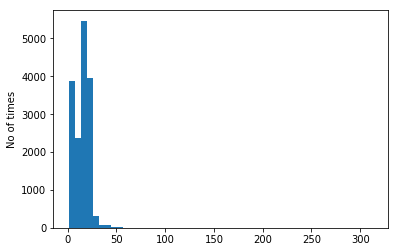

In [31]:
plt.hist(df.number_of_prior_year_transactions,bins=50)
plt.ylabel('No of times')
plt.show()

In [20]:
bin_labels=['sale_1319.313_to_155862.72','sale_155862.72_to_303035.2','sale_303035.2_to_517717.2','sale_517717.26_to_929078.857','sale_929078.857_to_34412125.8']
#df['hist_sales_bin_no_label']=pd.qcut(df['historical_sales_volume'],5)
df['hist_sales_bin']=pd.qcut(df['historical_sales_volume'],5,labels=bin_labels) #to create bins on historical sales volume
#df['hist_sales_bin']=df.hist_sales_bin.astype(int)
#df['hist_sales_bin_no_label'].unique()
#df.drop(['hist_sales_bin_no_label'],axis=1)

In [21]:
bin_labels_yr=['0-10','11-20','21-30','30-40','40-50','50+']
df['hist_years_as_customer_bin']=pd.cut(df['years_as_customer'],bins=[0,10,20,30,40,50,100],labels=bin_labels_yr)
#df['hist_sales_bin']=pd.qcut(df['historical_sales_volume'],5,labels=bin_labels) #to create bins on historical sales volume
#df['hist_sales_bin']=df.hist_sales_bin.astype(int)
df['hist_years_as_customer_bin'].unique()
#df.drop(['hist_sales_bin_no_label'],axis=1)

[50+, 30-40, 40-50, 0-10, 21-30, 11-20]
Categories (6, object): [0-10 < 11-20 < 21-30 < 30-40 < 40-50 < 50+]

In [22]:
bin_labels_tr=['0-5','6-10','11-15','16-20','21-25','25+']
df['hist_transactions_bin']=pd.cut(df['number_of_prior_year_transactions'],bins=[0,5,10,15,20,25,100],labels=bin_labels_tr)
#df['hist_sales_bin']=pd.qcut(df['historical_sales_volume'],5,labels=bin_labels) #to create bins on historical sales volume
#df['hist_sales_bin']=df.hist_sales_bin.astype(int)
df['hist_transactions_bin'].unique()
#df.drop(['hist_sales_bin_no_label'],axis=1

[11-15, 21-25, 16-20, 6-10, 25+, 0-5, NaN]
Categories (6, object): [0-5 < 6-10 < 11-15 < 16-20 < 21-25 < 25+]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16170 entries, 0 to 16171
Data columns (total 27 columns):
customer_number                      16170 non-null int32
campaign_period_sales                16170 non-null float64
historical_sales_volume              16170 non-null float64
date_of_first_purchase               16170 non-null datetime64[ns]
number_of_prior_year_transactions    16170 non-null int32
do_not_direct_mail_solicit           16170 non-null float64
do_not_email                         16170 non-null float64
do_not_telemarket                    16170 non-null float64
repurchase_method                    16170 non-null object
last_transaction_channel             16170 non-null object
desk                                 16170 non-null int32
executive_chair                      16170 non-null int32
standard_chair                       16170 non-null int32
monitor                              16170 non-null int32
printer                              16170 non-null int32


In [211]:
df.hist_years_as_customer_bin.unique()

[50+, 30-40, 40-50, 0-10, 21-30, 11-20]
Categories (6, object): [0-10 < 11-20 < 21-30 < 30-40 < 40-50 < 50+]

In [36]:
df.describe()

,customer_number,campaign_period_sales,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,num_emp,cp_sales,years_as_customer
count,1.617000e+04,16170.000000,1.617000e+04,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000
mean,2.070280e+07,245.927381,6.716669e+05,14.484663,0.107792,0.211812,0.097588,0.056401,0.071552,0.017378,0.018429,0.026345,0.014286,0.119481,0.065492,0.729932,33.845578,0.270810,26.199814
std,1.898510e+07,720.356806,9.566761e+05,8.030589,0.310127,0.408605,0.296766,0.230701,0.257753,0.130679,0.134502,0.160164,0.118670,0.324363,0.247399,0.444008,80.971924,0.444392,10.957944
min,8.673400e+04,-566.500000,-1.643031e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
25%,9.101225e+06,0.000000,1.900162e+05,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,22.000000
50%,1.807196e+07,0.000000,3.965039e+05,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,26.000000
75%,2.712075e+07,145.673810,7.874578e+05,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,1.000000,32.000000
max,1.672359e+08,8936.850000,3.441213e+07,313.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500.000000,1.000000,93.000000


In [23]:
df.drop(labels=df.loc[df.number_of_prior_year_transactions==313].index,axis=0,inplace=True) # to drop the outlier in the column number_of_prior_year_transactions


In [27]:

df.drop(['customer_number','do_not_direct_mail_solicit','do_not_email','do_not_telemarket'],axis=1,inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16165 entries, 0 to 16171
Data columns (total 23 columns):
campaign_period_sales                16165 non-null float64
historical_sales_volume              16165 non-null float64
date_of_first_purchase               16165 non-null datetime64[ns]
number_of_prior_year_transactions    16165 non-null int32
repurchase_method                    16165 non-null object
last_transaction_channel             16165 non-null object
desk                                 16165 non-null int32
executive_chair                      16165 non-null int32
standard_chair                       16165 non-null int32
monitor                              16165 non-null int32
printer                              16165 non-null int32
computer                             16165 non-null int32
insurance                            16165 non-null int32
toner                                16165 non-null int32
office_supplies                      16165 non-null int32
number

In [403]:
df1=pd.get_dummies(df['repurchase_method'],prefix='repurchase_method')
df2=pd.get_dummies(df['last_transaction_channel'],prefix='last_transaction_channel')
df3=pd.get_dummies(df['num_emp'],prefix='num_emp_avg')
df4=pd.get_dummies(df['hist_sales_bin'])
df5=pd.get_dummies(df['hist_years_as_customer_bin'],prefix='Years')
df6=pd.get_dummies(df['hist_transactions_bin'],prefix='Transactions')
df7=pd.get_dummies(df['language'],prefix='language')

In [404]:
frames=[df,df1,df2,df3,df4,df5,df6,df7]
result=pd.concat(frames,axis=1)
result.head()

,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,num_emp,cp_sales,years_as_customer,hist_sales_bin,hist_years_as_customer_bin,hist_transactions_bin,repurchase_method_AUTO RENEW,repurchase_method_NOTICE,repurchase_method_PAYMENT PLAN,last_transaction_channel_AUTO RENEW,last_transaction_channel_BILLING,last_transaction_channel_BRANCH (PHONE),last_transaction_channel_BRANCH (POS),last_transaction_channel_IT,last_transaction_channel_MAIL,last_transaction_channel_NONE,last_transaction_channel_PHONE,last_transaction_channel_WEB,num_emp_avg_3,num_emp_avg_8,num_emp_avg_25,num_emp_avg_75,num_emp_avg_300,num_emp_avg_500,sale_1319.313_to_155862.72,sale_155862.72_to_303035.2,sale_303035.2_to_517717.2,sale_517717.26_to_929078.857,sale_929078.857_to_34412125.8,Years_0-10,Years_11-20,Years_21-30,Years_30-40,Years_40-50,Years_50+,Transactions_0-5,Transactions_6-10,Transactions_11-15,Transactions_16-20,Transactions_21-25,Transactions_25+,language_Arabic,language_Chinese,language_English,language_French,language_German,language_Greek,language_Hebrew,language_Hindi,language_Italian,language_Japanese,language_Korean,language_NONE,language_Pashto,language_Polish,language_Portuguese,language_Russian,language_Spanish,language_Thai,language_Vietnamese
0,238.704762,146803.428571,1968-10-01,15,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,6-10,English,8,1,51,sale_1319.313_to_155862.72,50+,11-15,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,281.680000,439984.160000,1981-06-15,22,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,11-50,English,25,1,38,sale_303035.2_to_517717.2,30-40,21-25,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,432.857143,970465.714286,1962-11-01,19,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,6-10,English,8,1,57,sale_929078.857_to_34412125.8,50+,16-20,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.000000,230193.600000,1983-06-01,17,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,1-5,English,3,0,36,sale_155862.72_to_303035.2,30-40,16-20,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1370.166667,27403.333333,1987-07-15,21,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,NONE,NONE,8,1,32,sale_1319.313_to_155862.72,30-40,21-25,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
#export_csv = result.to_csv (r'C:\Users\bsamuel\Desktop\DS\Capstone\results.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
result = pd.read_csv(r'C:\Users\bsamuel\Desktop\DS\Capstone\results.csv')
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Data columns (total 62 columns):
customer_number                            16165 non-null int64
campaign_period_sales                      16165 non-null float64
historical_sales_volume                    16165 non-null float64
date_of_first_purchase                     16165 non-null object
number_of_prior_year_transactions          16165 non-null int64
do_not_direct_mail_solicit                 16165 non-null float64
do_not_email                               16165 non-null float64
do_not_telemarket                          16165 non-null float64
repurchase_method                          16165 non-null object
last_transaction_channel                   16165 non-null object
desk                                       16165 non-null int64
executive_chair                            16165 non-null int64
standard_chair                             16165 non-null int64
monitor                                    161

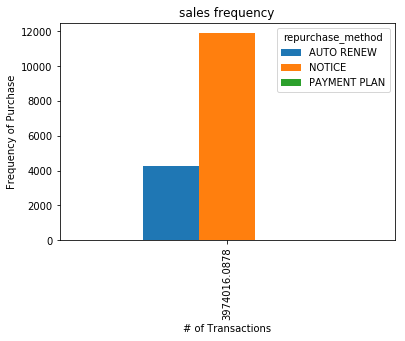

In [16]:
pd.crosstab(result.campaign_period_sales.sum(),result.repurchase_method).plot(kind='bar')
plt.title('sales frequency')
plt.xlabel('# of Transactions')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [27]:
print(result.groupby('stationary').sum().campaign_period_sales)
print(result.groupby('furniture').sum().campaign_period_sales)
print(result.groupby('technology').sum().campaign_period_sales)
print(result.groupby('repurchase_method').sum().campaign_period_sales)
print(result.groupby('num_emp').sum().campaign_period_sales)

stationary
0    1.998593e+06
1    1.975423e+06
Name: campaign_period_sales, dtype: float64
furniture
0    2.854494e+06
1    1.119522e+06
Name: campaign_period_sales, dtype: float64
technology
0    3.167354e+06
1    8.066619e+05
Name: campaign_period_sales, dtype: float64
repurchase_method
AUTO RENEW      1.873355e+06
NOTICE          2.098193e+06
PAYMENT PLAN    2.468333e+03
Name: campaign_period_sales, dtype: float64
num_emp
3      1.659592e+05
8      3.053994e+06
25     2.467587e+05
75     1.857465e+05
300    1.961082e+05
500    1.254492e+05
Name: campaign_period_sales, dtype: float64


In [10]:
result['furniture']=np.where((result['desk']==1)|(result['executive_chair']==1)|(result['standard_chair']==1),1,0)
result['technology']=np.where((result['monitor']==1)|(result['printer']==1)|(result['computer']==1),1,0)
result['stationary']=np.where((result['office_supplies']==1)|(result['toner']==1),1,0)
result['lang']=np.where(result['language']=="English","English","Other")
df1=pd.get_dummies(result['lang'],prefix='lang')
frames=[result,df1]
result=pd.concat(frames,axis=1)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Data columns (total 68 columns):
customer_number                            16165 non-null int64
campaign_period_sales                      16165 non-null float64
historical_sales_volume                    16165 non-null float64
date_of_first_purchase                     16165 non-null object
number_of_prior_year_transactions          16165 non-null int64
do_not_direct_mail_solicit                 16165 non-null float64
do_not_email                               16165 non-null float64
do_not_telemarket                          16165 non-null float64
repurchase_method                          16165 non-null object
last_transaction_channel                   16165 non-null object
desk                                       16165 non-null int64
executive_chair                            16165 non-null int64
standard_chair                             16165 non-null int64
monitor                                    161

In [187]:
result.furniture.value_counts()

0    14177
1     1988
Name: furniture, dtype: int64

In [31]:
cols_to_drop=[0,1,2,3,4,5,6,7,8,9,19,20,21,23,24,25,26]
#cols_to_drop=[0,1,2,3,4,5,6,7,8,9]

result.drop(result.columns[cols_to_drop],axis=1,inplace=True)
result.columns=[col.strip().lower().replace(' ','_') for col in result.columns] 
print(result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Data columns (total 45 columns):
desk                                       16165 non-null int64
executive_chair                            16165 non-null int64
standard_chair                             16165 non-null int64
monitor                                    16165 non-null int64
printer                                    16165 non-null int64
computer                                   16165 non-null int64
insurance                                  16165 non-null int64
toner                                      16165 non-null int64
office_supplies                            16165 non-null int64
cp_sales                                   16165 non-null int64
repurchase_method_auto_renew               16165 non-null int64
repurchase_method_notice                   16165 non-null int64
repurchase_method_payment_plan             16165 non-null int64
last_transaction_channel_auto_renew        16165 non-null i

In [93]:
prod_cols=[0,1,2,3,4,5,6,7,8]
result_noPro=result.drop(result.columns[prod_cols],axis=1)
result_noPro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Data columns (total 41 columns):
cp_sales                                   16165 non-null int64
repurchase_method_auto_renew               16165 non-null int64
repurchase_method_notice                   16165 non-null int64
repurchase_method_payment_plan             16165 non-null int64
last_transaction_channel_auto_renew        16165 non-null int64
last_transaction_channel_billing           16165 non-null int64
last_transaction_channel_branch_(phone)    16165 non-null int64
last_transaction_channel_branch_(pos)      16165 non-null int64
last_transaction_channel_it                16165 non-null int64
last_transaction_channel_mail              16165 non-null int64
last_transaction_channel_none              16165 non-null int64
last_transaction_channel_phone             16165 non-null int64
last_transaction_channel_web               16165 non-null int64
num_emp_avg_3                              16165 non-null i

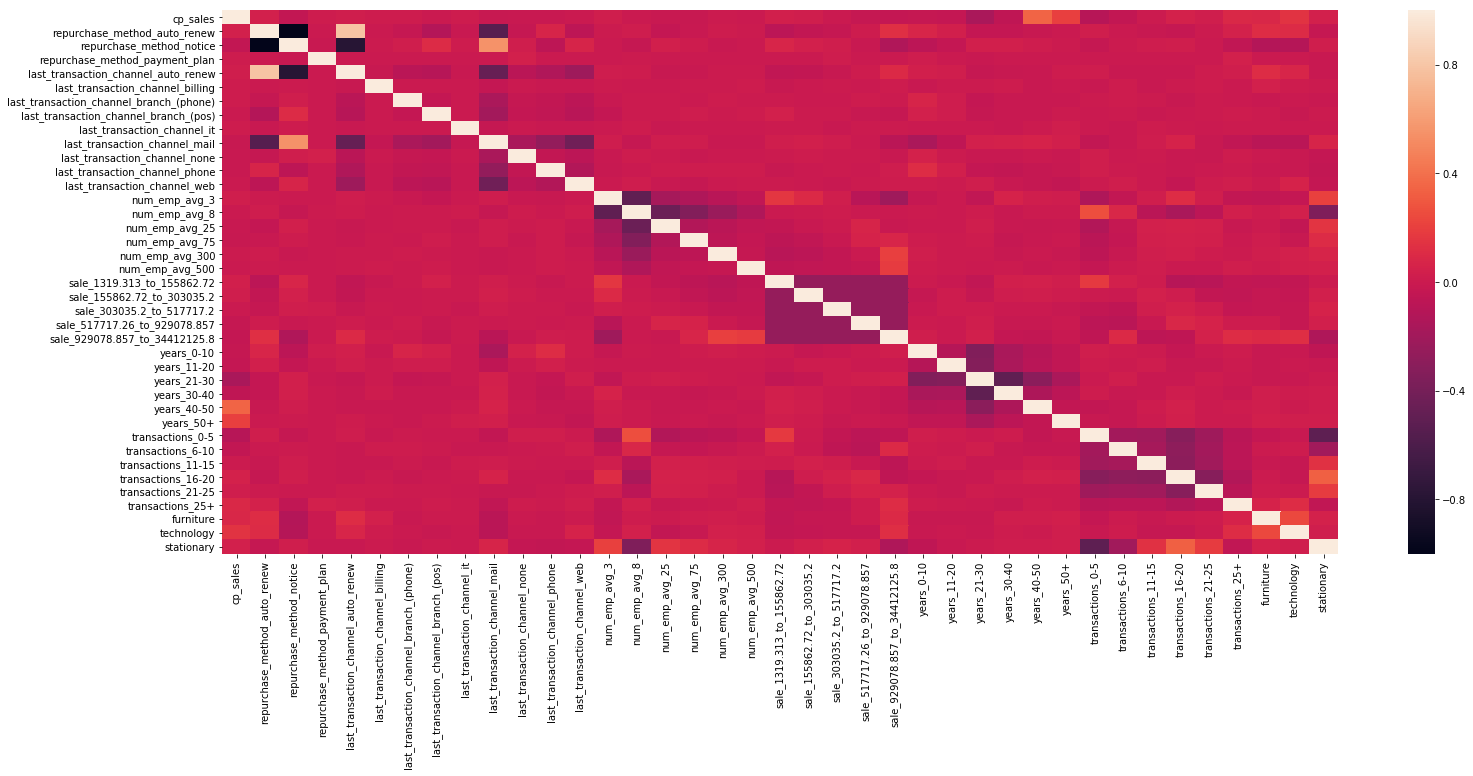

In [6]:
corr_result = result_noPro.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr_result)

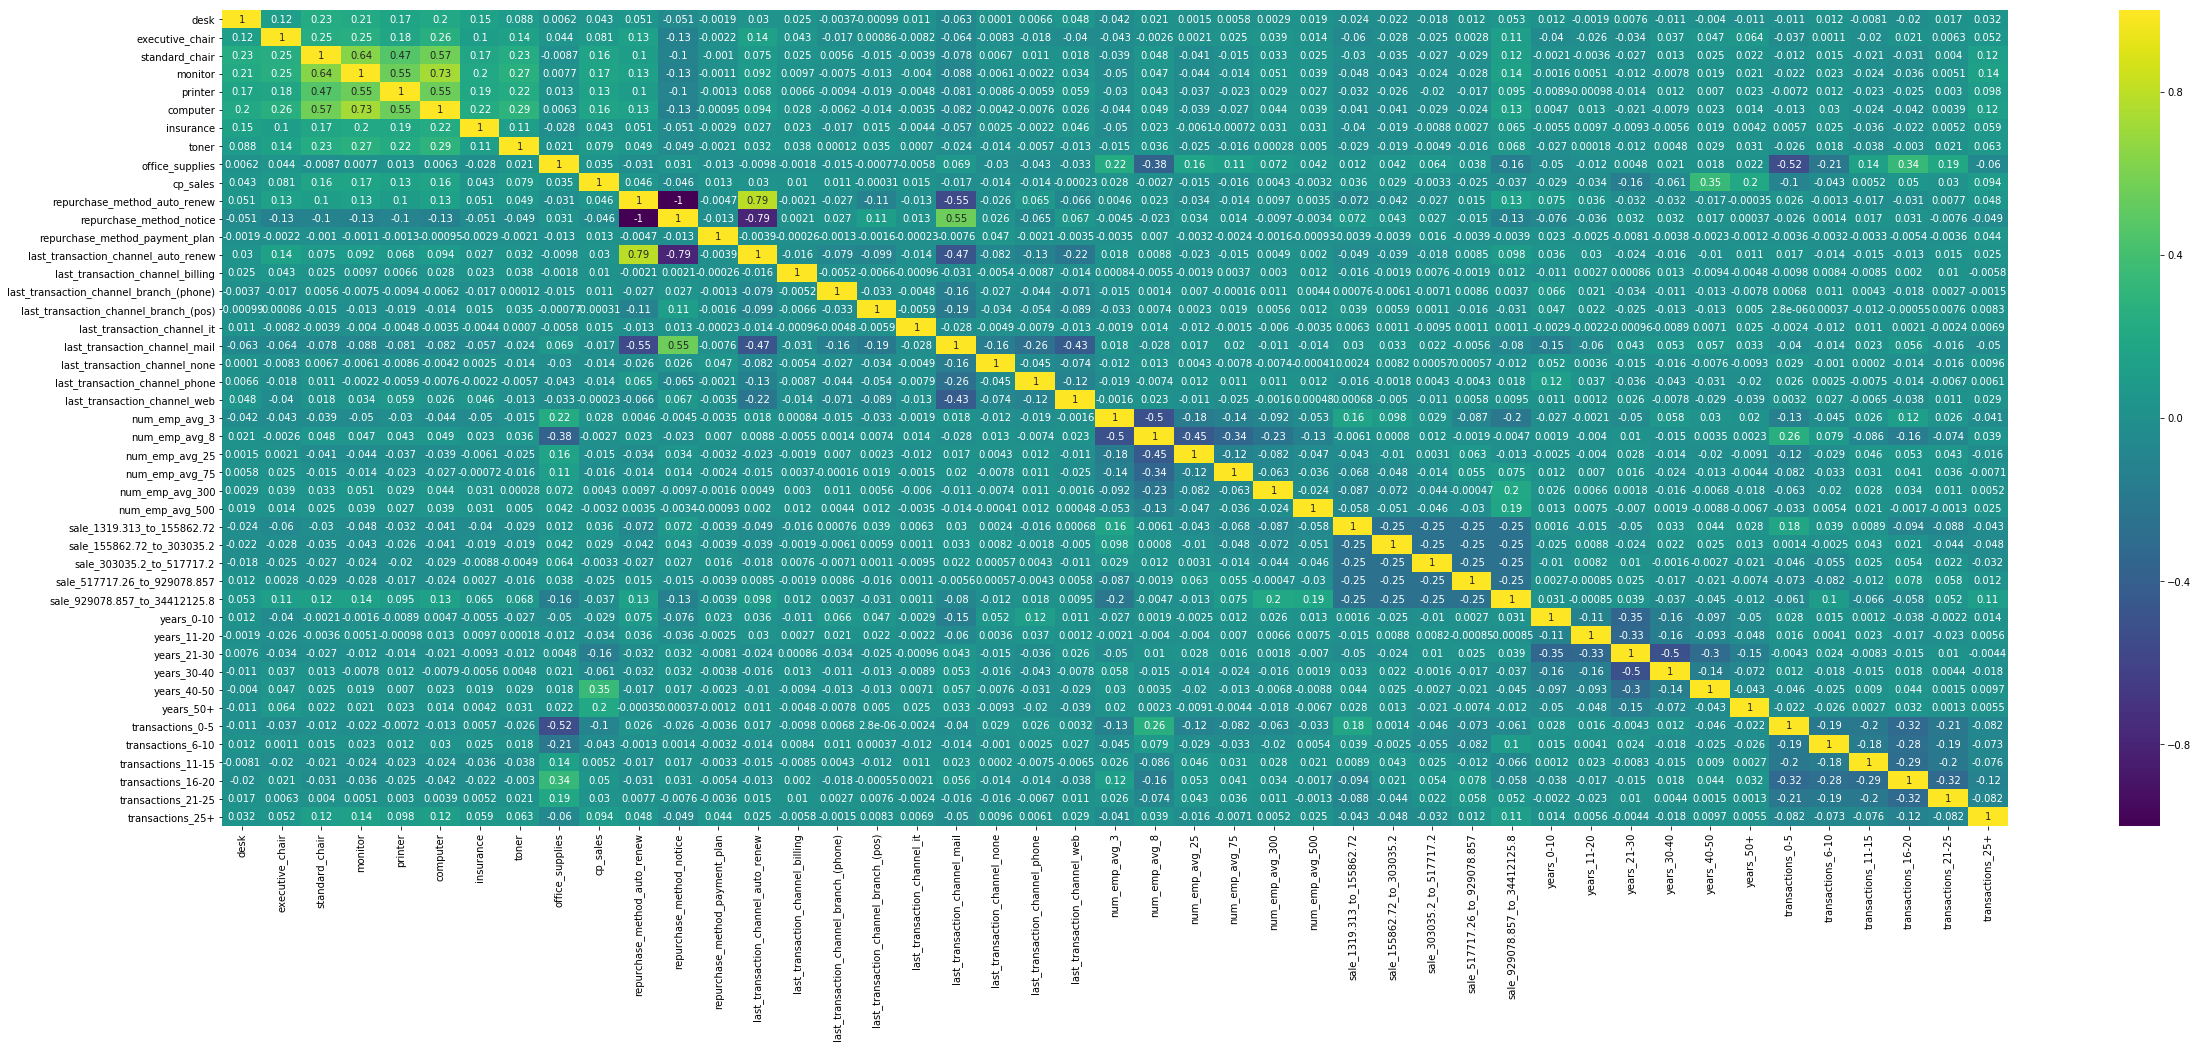

In [97]:
corr_result = result.corr()
plt.figure(figsize=(40,15))
sns.heatmap(data= corr_result, annot=True, cmap='viridis')

In [7]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
#result.hist_sales_bin

In [ ]:
sns.set(style = 'ticks', color_codes=True)
sns.pairplot(data=result_noPro, hue='cp_sales')

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encounte

KeyboardInterrupt: 

In [61]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [62]:
for col in result.columns:
    if col == 'cp_sales': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        woe, iv = calculate_woe_iv(result, col, 'cp_sales')
        print(woe)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: desk
     All   Bad   Good  Value  Distr_Good  Distr_Bad       WoE        IV
1    912   318    594      1    0.050395   0.072636 -0.365577  0.008131
0  15253  4060  11193      0    0.949605   0.927364  0.023700  0.000527
IV score: 0.01


WoE and IV for column: executive_chair
     All   Bad   Good  Value  Distr_Good  Distr_Bad       WoE        IV
1   1157   463    694      1    0.058878   0.105756 -0.585660  0.027454
0  15008  3915  11093      0    0.941122   0.894244  0.051094  0.002395
IV score: 0.03


WoE and IV for column: standard_chair
     All   Bad   Good  Value  Distr_Good  Distr_Bad       WoE        IV
1    281   223     58      1    0.004921   0.050937 -2.337134  0.107545
0  15884  4155  11729      0    0.995079   0.949063  0.047347  0.002179
IV score: 0.11


WoE and IV for column: monitor
     All   Bad   Good  Value  Distr_Good  Distr_Bad       WoE        IV
1    298   246     52      1    0.004412    0.05619 -2.544493  0.131750
0  15867  4132  11735

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


     All   Bad   Good  Value  Distr_Good  Distr_Bad       WoE            IV
1      1     1      0      1         0.0   0.000228  0.000000 -0.000000e+00
0  16164  4377  11787      0         1.0   0.999772  0.000228  5.217928e-08
IV score: 0.00


WoE and IV for column: last_transaction_channel_auto_renew
     All   Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
0   3141   937  2204      1    0.186986   0.214025 -0.135059  0.003652
1  13024  3441  9583      0    0.813014   0.785975  0.033823  0.000915
IV score: 0.00


WoE and IV for column: last_transaction_channel_billing
     All   Bad   Good  Value  Distr_Good  Distr_Bad       WoE            IV
1     17     7     10      1    0.000848   0.001599 -0.633730  4.756217e-04
0  16148  4371  11777      0    0.999152   0.998401  0.000751  5.639573e-07
IV score: 0.00


WoE and IV for column: last_transaction_channel_branch_(phone)
     All   Bad   Good  Value  Distr_Good  Distr_Bad       WoE        IV
1    411   124    287      1  

     All   Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
1   5230  1585  3645      1    0.309239   0.362037 -0.157633  0.008323
0  10935  2793  8142      0    0.690761   0.637963  0.079514  0.004198
IV score: 0.01


WoE and IV for column: transactions_21-25
     All   Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
1   2809   843  1966      1    0.166794   0.192554 -0.143616  0.003700
0  13356  3535  9821      0    0.833206   0.807446  0.031404  0.000809
IV score: 0.00


WoE and IV for column: transactions_25+
     All   Bad   Good  Value  Distr_Good  Distr_Bad       WoE        IV
1    498   251    247      1    0.020955   0.057332 -1.006470  0.036612
0  15667  4127  11540      0    0.979045   0.942668  0.037863  0.001377
IV score: 0.04


WoE and IV for column: furniture
     All   Bad   Good  Value  Distr_Good  Distr_Bad       WoE        IV
1   1988   728   1260      1    0.106897   0.166286 -0.441839  0.026240
0  14177  3650  10527      0    0.893103   0.833

In [7]:
#to add a decision tree to find feature importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf=DecisionTreeClassifier(random_state=0, max_depth=6)
forest=RandomForestClassifier()

In [119]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Data columns (total 45 columns):
desk                                       16165 non-null int64
executive_chair                            16165 non-null int64
standard_chair                             16165 non-null int64
monitor                                    16165 non-null int64
printer                                    16165 non-null int64
computer                                   16165 non-null int64
insurance                                  16165 non-null int64
toner                                      16165 non-null int64
office_supplies                            16165 non-null int64
cp_sales                                   16165 non-null int64
repurchase_method_auto_renew               16165 non-null int64
repurchase_method_notice                   16165 non-null int64
repurchase_method_payment_plan             16165 non-null int64
last_transaction_channel_auto_renew        16165 non-null i

In [124]:
plt.figure(figsize=(30,15))
cor = result.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()
#Correlation with output variable
cor_target = abs(cor["cp_sales"])
#Selecting highly correlated features
relevant_features = pd.DataFrame(cor_target[cor_target>0.1])
relevant_features.index
print(result[['standard_chair', 'monitor', 'printer', 'computer', 'cp_sales',
       'years_21-30', 'years_40-50', 'years_50+']].corr())

                standard_chair   monitor   printer  computer  cp_sales  \
standard_chair        1.000000  0.639776  0.465684  0.570247  0.156464   
monitor               0.639776  1.000000  0.548774  0.727465  0.171054   
printer               0.465684  0.548774  1.000000  0.549636  0.134377   
computer              0.570247  0.727465  0.549636  1.000000  0.156512   
cp_sales              0.156464  0.171054  0.134377  0.156512  1.000000   
years_21-30          -0.026580 -0.011815 -0.013847 -0.021122 -0.159641   
years_40-50           0.024969  0.018555  0.006988  0.023393  0.349349   
years_50+             0.022492  0.020689  0.023288  0.014320  0.196274   

                years_21-30  years_40-50  years_50+  
standard_chair    -0.026580     0.024969   0.022492  
monitor           -0.011815     0.018555   0.020689  
printer           -0.013847     0.006988   0.023288  
computer          -0.021122     0.023393   0.014320  
cp_sales          -0.159641     0.349349   0.196274  
years_21-

<Figure size 2160x1080 with 0 Axes>

In [32]:
# to select the features for creating a model
'''removed ,'repurchase_method_auto_renew',
              'years_21-30','years_30-40','years_40-50','years_50+','transactions_0-5',
             'transactions_25+''executive_chair','monitor','furniture','technology','transactions_21-25','transactions_11-15','transactions_16-20','transactions_6-10','''

#clean=result.loc[:,selected].dropna()
feature_cols=['desk', 'executive_chair', 'standard_chair', 'monitor', 'printer',
       'computer', 'toner', 'office_supplies', 'repurchase_method_notice',
       'repurchase_method_payment_plan', 'last_transaction_channel_auto_renew',
       'last_transaction_channel_billing',
       'last_transaction_channel_branch_(phone)',
       'last_transaction_channel_branch_(pos)', 'last_transaction_channel_it',
       'last_transaction_channel_mail', 'last_transaction_channel_none',
       'last_transaction_channel_phone', 'num_emp_avg_300', 'num_emp_avg_500',
       'sale_1319.313_to_155862.72', 'sale_155862.72_to_303035.2',
       'sale_303035.2_to_517717.2', 'sale_517717.26_to_929078.857',
       'sale_929078.857_to_34412125.8', 'years_0-10', 'years_11-20',
       'years_21-30', 'years_30-40', 'years_40-50', 'years_50+',
       'transactions_0-5', 'transactions_6-10', 'transactions_16-20',
       'transactions_21-25', 'transactions_25+']
X=result.loc[:,feature_cols]
#X = result.drop(['cp_sales'],axis=1)
#X = result_noPro.drop(['cp_sales'],axis=1)
#y=result_noPro.cp_sales
y=result.cp_sales
#y=clean.cp_sales
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Data columns (total 36 columns):
desk                                       16165 non-null int64
executive_chair                            16165 non-null int64
standard_chair                             16165 non-null int64
monitor                                    16165 non-null int64
printer                                    16165 non-null int64
computer                                   16165 non-null int64
toner                                      16165 non-null int64
office_supplies                            16165 non-null int64
repurchase_method_notice                   16165 non-null int64
repurchase_method_payment_plan             16165 non-null int64
last_transaction_channel_auto_renew        16165 non-null int64
last_transaction_channel_billing           16165 non-null int64
last_transaction_channel_branch_(phone)    16165 non-null int64
last_transaction_channel_branch_(pos)      16165 non-null i

In [117]:
log_reg = LogisticRegression()
#Initializing RFE model
rfe = RFE(log_reg)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
log_reg.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
#no of features
nof_list=np.arange(1,44)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    log_reg = LogisticRegression()
    rfe = RFE(log_reg,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    log_reg.fit(X_train_rfe,y_train)
    score = log_reg.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

[False False  True  True  True  True False False  True False  True  True
 False  True  True False  True False False False False False False False
 False False False  True False False  True  True  True  True  True  True
  True  True  True  True False False False  True]
[14 12  1  1  1  1 19  6  1 18  1  1  9  1  1 15  1 10  7 11 16 17 22 23
 21  2  8  1  5 13  1  1  1  1  1  1  1  1  1  1 20  4  3  1]


C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

Optimum number of features: 36
Score with 36 features: 0.802062


In [118]:
cols = list(X.columns)
log_reg = LogisticRegression()
#Initializing RFE model
rfe = RFE(log_reg, 36)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
log_reg.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

Index(['desk', 'executive_chair', 'standard_chair', 'monitor', 'printer',
       'computer', 'toner', 'office_supplies', 'repurchase_method_notice',
       'repurchase_method_payment_plan', 'last_transaction_channel_auto_renew',
       'last_transaction_channel_billing',
       'last_transaction_channel_branch_(phone)',
       'last_transaction_channel_branch_(pos)', 'last_transaction_channel_it',
       'last_transaction_channel_mail', 'last_transaction_channel_none',
       'last_transaction_channel_phone', 'num_emp_avg_300', 'num_emp_avg_500',
       'sale_1319.313_to_155862.72', 'sale_155862.72_to_303035.2',
       'sale_303035.2_to_517717.2', 'sale_517717.26_to_929078.857',
       'sale_929078.857_to_34412125.8', 'years_0-10', 'years_11-20',
       'years_21-30', 'years_30-40', 'years_40-50', 'years_50+',
       'transactions_0-5', 'transactions_6-10', 'transactions_16-20',
       'transactions_21-25', 'transactions_25+'],
      dtype='object')


C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# split X and y into training and testing sets
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y, random_state=42)

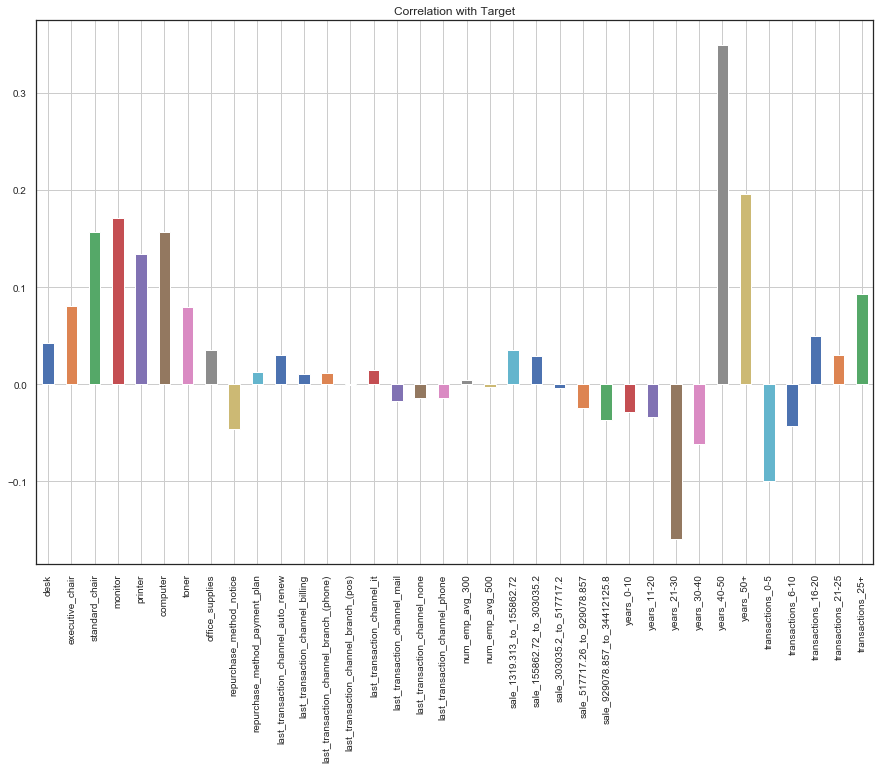

In [127]:
X.corrwith(result.cp_sales).plot.bar(figsize = 
                                     (15, 10), title = "Correlation with Target", fontsize = 10,grid = True)

In [514]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)
#selected=vif.loc[vif['VIF Factor'] < 10].features.values.tolist()
#X_train.columns[selected]
#features_list = selected.tolist()
#X_train.columns[features_list]
#X_train[X_train.columns[selected]]
#vif["features"]
#print(selected)

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,4.100000,desk
1,5.400000,executive_chair
2,2.100000,standard_chair
3,3.700000,monitor
4,5.000000,printer
5,2.500000,computer
6,1.100000,insurance
7,1.500000,toner
8,17.800000,office_supplies
9,inf,num_emp


In [350]:
grid.fit(X_train,y_train)

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 10

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 10

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15, 20], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [351]:
grid.score(X_test,y_test)
#0.8028865979381443 without years 21-30
#0.8049484536082474 including monitor
#0.8039175257731959 including printer
#0.8043298969072165 including executive chair
#0.8051546391752578 including 'sale_929078.857_to_34412125.8'
#0.8020618556701031 including sale_1319.313_to_155862.72
#0.8041237113402062 including transactions_16-20
#0.8037113402061856 including office_supplies
#0.8045360824742268 including repurchase_method_payment_plan

0.7954639175257732

In [113]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [100]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [108]:
#logistic regression model
model = LogisticRegression()

model.fit(X_train,y_train)

#
#Predicting Test set
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.807609,0.845109,0.355023,0.5


In [109]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(model, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

[False False  True  True  True  True False False  True  True  True  True
 False False False False False False False False False False False False
 False False False  True False False  True  True  True  True  True  True
  True  True  True  True False  True  True  True]
[18 12  1  1  1  1 15 11  1  1  1  1  6 17  5 14 10 19  7 23  4  9 22 20
 16  3 21  1  2 13  1  1  1  1  1  1  1  1  1  1  8  1  1  1]


C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Index(['standard_chair', 'monitor', 'printer', 'computer', 'office_supplies',
       'repurchase_method_auto_renew', 'repurchase_method_notice',
       'repurchase_method_payment_plan', 'sale_1319.313_to_155862.72',
       'sale_517717.26_to_929078.857', 'sale_929078.857_to_34412125.8',
       'years_0-10', 'years_11-20', 'years_21-30', 'years_30-40',
       'years_40-50', 'years_50+', 'transactions_0-5', 'transactions_6-10',
       'transactions_16-20', 'transactions_21-25', 'transactions_25+'],
      dtype='object')

In [110]:
#Applying K-folds validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= model, X=X_train, y=y_train, cv=20)
accuracies.mean()
accuracies.std()
print('Logistic Regression (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

Logistic Regression (Lasso) Accuracy: 0.805 (+/- 0.016)


C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
#Plotting Cumulative Accuracy Profile (CAP)
y_pred_prob = model.predict_proba(X_test)
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    

NameError: name 'model' is not defined

      0         1
0   1.0  0.982404
1   1.0  0.980708
2   1.0  0.978324
3   1.0  0.975226
4   1.0  0.975040
5   0.0  0.958900
6   1.0  0.956091
7   1.0  0.953974
8   1.0  0.943792
9   1.0  0.939567
10  1.0  0.921328
11  1.0  0.915166
12  0.0  0.912706
13  1.0  0.909382
14  1.0  0.906667
15  1.0  0.905948
16  1.0  0.897427
17  1.0  0.897190
18  1.0  0.896274
19  1.0  0.895523


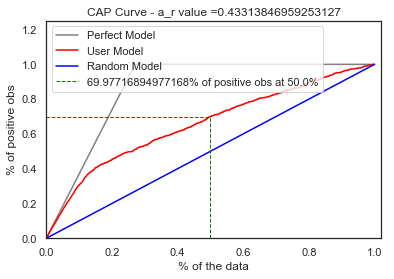

In [104]:
capcurve(y_test,y_pred_prob[:,1])


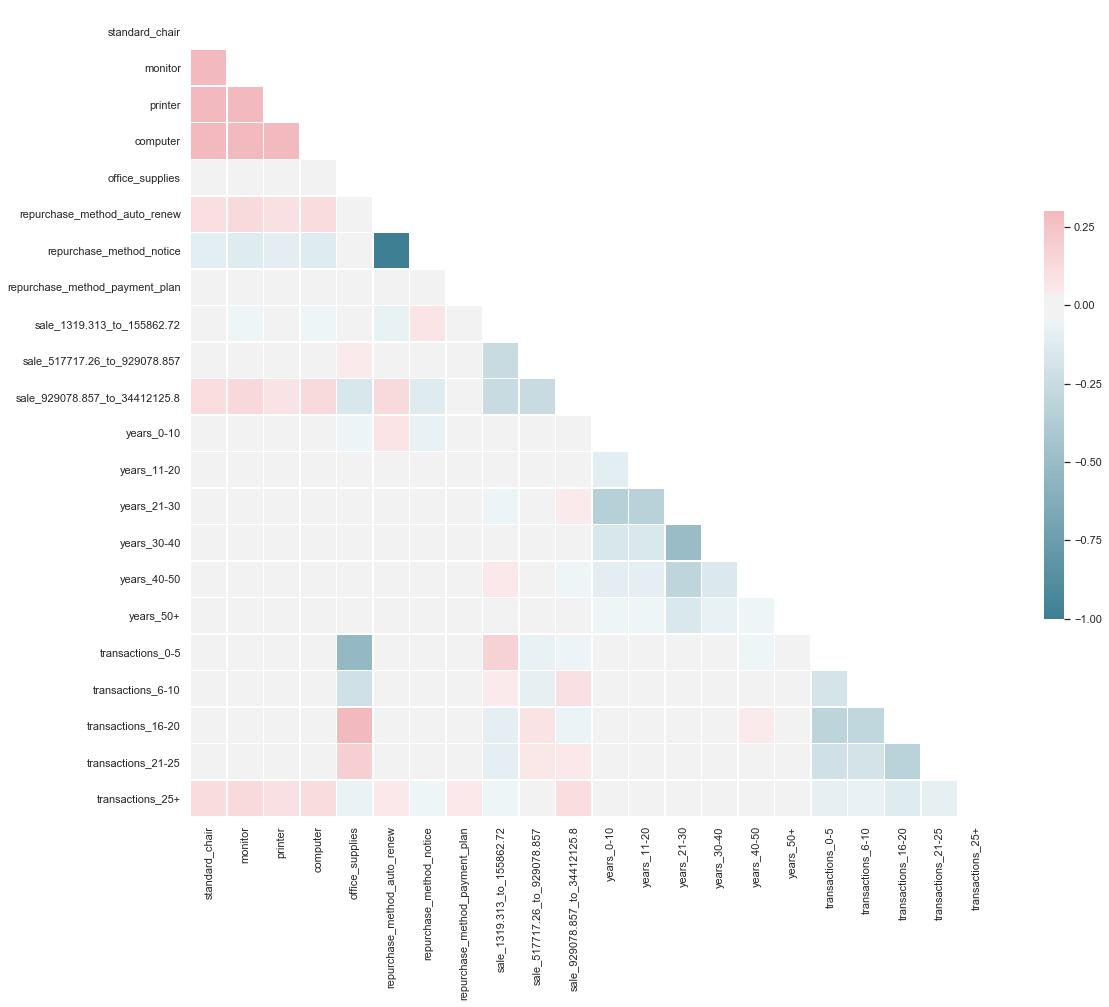

In [106]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

In [105]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
results=logit_model.fit()
print(results.summary2())

         Current function value: 0.480809
         Iterations: 35
                                            Results: Logit
Model:                           Logit                        Pseudo R-squared:             0.177     
Dependent Variable:              cp_sales                     AIC:                          15622.5681
Date:                            2020-01-04 22:18             BIC:                          15922.5016
No. Observations:                16165                        Log-Likelihood:               -7772.3   
Df Model:                        38                           LL-Null:                      -9441.7   
Df Residuals:                    16126                        LLR p-value:                  0.0000    
Converged:                       0.0000                       Scale:                        1.0000    
No. Iterations:                  35.0000                                                              
---------------------------------------------------

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  co

In [111]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, penalty= 'l1')
model.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = model.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.807609,0.845109,0.355023,0.500000
1,Logistic Regression RFE (Lasso),0.804825,0.833787,0.349315,0.492357


      0         1
0   1.0  0.999013
1   1.0  0.998983
2   1.0  0.998527
3   1.0  0.998527
4   1.0  0.994349
5   1.0  0.993277
6   1.0  0.985034
7   1.0  0.983072
8   1.0  0.979888
9   0.0  0.979125
10  1.0  0.977805
11  1.0  0.977805
12  1.0  0.975032
13  1.0  0.974359
14  1.0  0.972941
15  1.0  0.967559
16  1.0  0.965866
17  1.0  0.965234
18  0.0  0.960681
19  1.0  0.956790


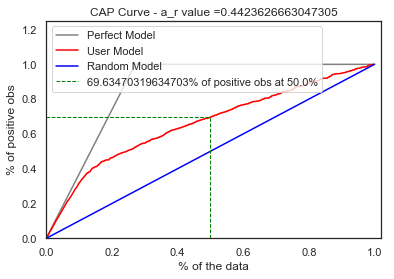

In [112]:
y_pred_prob = model.predict_proba(X_test[X_train.columns[rfe.support_]])
capcurve(y_test,y_pred_prob[:,1])

In [499]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_test[X_train.columns[rfe.support_]].values, i) for i in range(X_test[X_train.columns[rfe.support_]].shape[1])]
vif["features"] = X_test[X_train.columns[rfe.support_]].columns
vif.round(1)
selected=vif.loc[vif['VIF Factor'] < 10].features.values.tolist()
#X_train.columns[selected]
#features_list = selected.tolist()
#X_train.columns[features_list]
#X_train[X_train.columns[selected]]
#vif["features"]
#print(selected)

In [128]:
#decision tree classifier model
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)


from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.805360824742268

In [42]:
#logistic regression model
model_log = LogisticRegression(solver='liblinear',random_state=42,fit_intercept=True)

model_log.fit(X_train,y_train)

#
y_pred_log=model_log.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_log)

0.8078350515463918

In [43]:
print(model_log.coef_)
X.columns
cnf_matrix = confusion_matrix(y_test, y_pred_log)

cnf_matrix

[[ 0.05527634  0.08998099  1.2292114   0.93921607  0.75290952  1.3424101
   0.09162749 -0.43927126 -0.33569917  0.38665134 -0.21347822  0.24247591
   0.08360783  0.00298097  0.3593177  -0.12214172 -0.26867734 -0.15096637
   0.22188559 -0.07537805  0.35472334  0.22154138  0.09609643 -0.08601565
  -0.36365626 -0.88927556 -0.87474744 -0.98557192 -0.931318    1.7641741
   2.13942806 -0.90764462 -0.43181405  0.1981744   0.18355302  0.90296833]]


array([[3437,   99],
       [ 833,  481]], dtype=int64)

In [47]:
y_pred_prob = model_log.predict_proba(X_test)
y_pred_total=model_log.predict(X)
cnf_matrix_total = confusion_matrix(y, y_pred_total)

cnf_matrix_total

array([[11444,   343],
       [ 2794,  1584]], dtype=int64)

      0         1
0   1.0  0.998969
1   1.0  0.998917
2   1.0  0.998624
3   1.0  0.998586
4   1.0  0.998535
5   1.0  0.998201
6   1.0  0.997464
7   1.0  0.996980
8   1.0  0.993563
9   1.0  0.992163
10  1.0  0.986307
11  1.0  0.984111
12  1.0  0.982631
13  1.0  0.980168
14  1.0  0.980004
15  0.0  0.980004
16  1.0  0.979838
17  1.0  0.974366
18  1.0  0.973622
19  1.0  0.972667


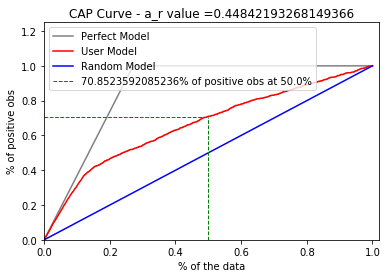

In [48]:
capcurve(y_test,y_pred_prob[:,1])

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_total))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11787
           1       0.82      0.36      0.50      4378

   micro avg       0.81      0.81      0.81     16165
   macro avg       0.81      0.67      0.69     16165
weighted avg       0.81      0.81      0.78     16165



In [160]:
probs=model_log.predict_proba(X)
probs[:,0]

array([0.11263627, 0.79019338, 0.21424526, ..., 0.88248687, 0.90153377,
       0.92559056])

In [168]:
result1 = pd.read_csv(r'C:\Users\bsamuel\Desktop\DS\Capstone\results.csv')
result1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Data columns (total 62 columns):
customer_number                            16165 non-null int64
campaign_period_sales                      16165 non-null float64
historical_sales_volume                    16165 non-null float64
date_of_first_purchase                     16165 non-null object
number_of_prior_year_transactions          16165 non-null int64
do_not_direct_mail_solicit                 16165 non-null float64
do_not_email                               16165 non-null float64
do_not_telemarket                          16165 non-null float64
repurchase_method                          16165 non-null object
last_transaction_channel                   16165 non-null object
desk                                       16165 non-null int64
executive_chair                            16165 non-null int64
standard_chair                             16165 non-null int64
monitor                                    161

In [171]:
result1['probs']=probs[:,0]
result1['success_pred']=(result1.probs<0.5).astype(np.int)
result1.describe()

,customer_number,campaign_period_sales,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,desk,executive_chair,standard_chair,...,Years_40-50,Years_50+,Transactions_0-5,Transactions_6-10,Transactions_11-15,Transactions_16-20,Transactions_21-25,Transactions_25+,probs,success_pred
count,1.616500e+04,16165.000000,1.616500e+04,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,...,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000
mean,2.070454e+07,245.840773,6.718844e+05,14.465574,0.107640,0.211816,0.097433,0.056418,0.071574,0.017383,...,0.077822,0.021652,0.173770,0.144695,0.153418,0.323539,0.173770,0.030807,0.729345,0.119208
std,1.898719e+07,720.213811,9.567421e+05,7.680832,0.309935,0.408608,0.296555,0.230735,0.257790,0.130699,...,0.267900,0.145548,0.378924,0.351804,0.360401,0.467841,0.378924,0.172801,0.208490,0.324043
min,8.673400e+04,-566.500000,1.319314e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000572,0.000000
25%,9.101823e+06,0.000000,1.900965e+05,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.741320,0.000000
50%,1.807200e+07,0.000000,3.965768e+05,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.796688,0.000000
75%,2.712108e+07,145.676190,7.876378e+05,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.843619,0.000000
max,1.672359e+08,8936.850000,3.441213e+07,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.952022,1.000000


In [166]:
print(result.success_pred.value_counts())
print(result.cp_sales.value_counts())

0    14238
1     1927
Name: success_pred, dtype: int64
0    11787
1     4378
Name: cp_sales, dtype: int64


In [172]:
export_csv = result1.to_csv (r'C:\Users\bsamuel\Desktop\DS\Capstone\results_with_sales_probabilities.csv', index = None, header=True)

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


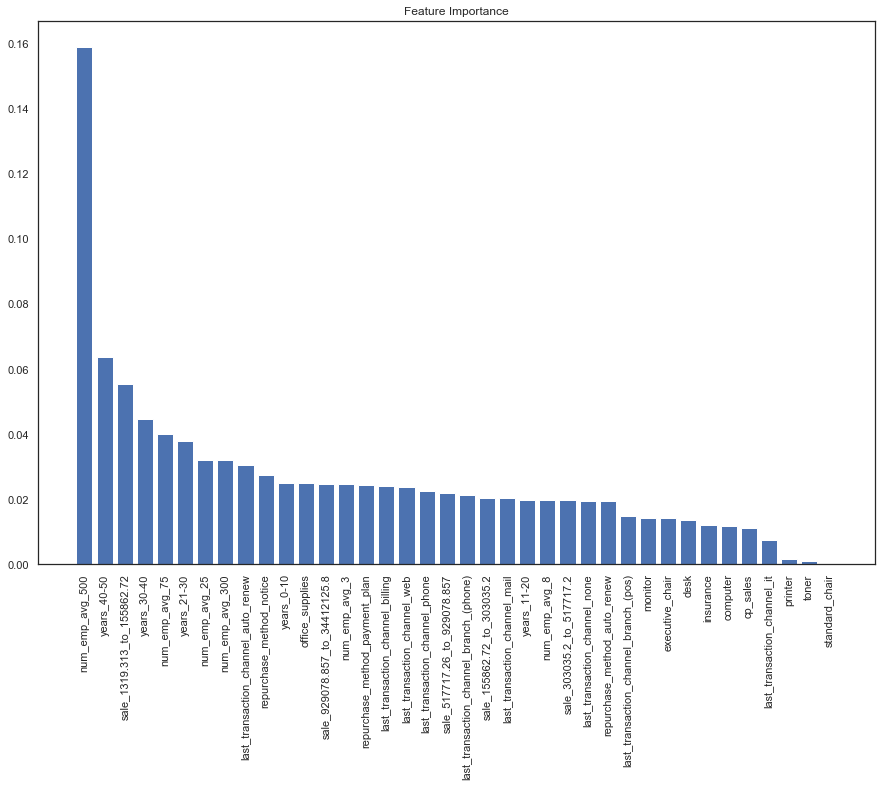

In [34]:

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# Create decision tree classifer object
clf1 = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf1.fit(X, y)

# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [result.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(15,10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [36]:
#Analyzing the coefficients
df1=pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(model.coef_), columns = ["coef"])
           ],axis = 1)
plt.figure(figsize=(30,15))
print(df1)
df1.plot(x='features',y='coef',kind='bar',figsize=(30,10))

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

Text(0.5, 257.44, 'Predicted label')

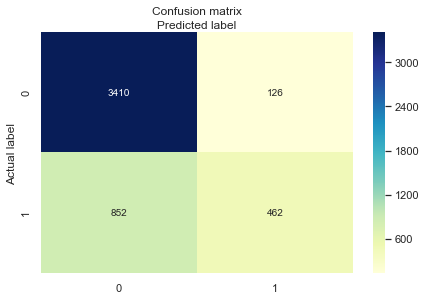

In [35]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.
            DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7983505154639176
Precision: 0.7857142857142857
Recall: 0.3515981735159817


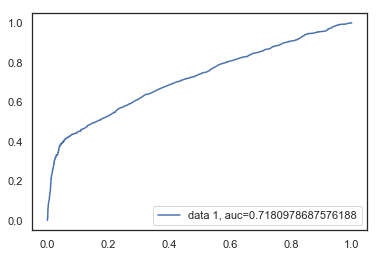

In [54]:
y_pred_proba = model.predict_proba(X_test[X_train.columns[rfe.support_]])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [287]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

#start_time = time.time()
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.795493 using {'C': 1.0, 'dual': True, 'max_iter': 100}


C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [73]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty= 'l1')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred1 = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

result = result.append(model_results, ignore_index = True)
result

C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsamuel\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Accuracy,F1 Score,Model,Precision,Recall,computer,cp_sales,desk,executive_chair,insurance,last_transaction_channel_auto_renew,last_transaction_channel_billing,last_transaction_channel_branch_(phone),last_transaction_channel_branch_(pos),last_transaction_channel_it,last_transaction_channel_mail,last_transaction_channel_none,last_transaction_channel_phone,last_transaction_channel_web,monitor,num_emp_avg_25,num_emp_avg_3,num_emp_avg_300,num_emp_avg_500,num_emp_avg_75,num_emp_avg_8,office_supplies,printer,repurchase_method_auto_renew,repurchase_method_notice,repurchase_method_payment_plan,sale_1319.313_to_155862.72,sale_155862.72_to_303035.2,sale_303035.2_to_517717.2,sale_517717.26_to_929078.857,sale_929078.857_to_34412125.8,standard_chair,toner,transactions_0-5,transactions_11-15,transactions_16-20,transactions_21-25,transactions_25+,transactions_6-10,years_0-10,years_11-20,years_21-30,years_30-40,years_40-50,years_50+
0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
pd.set_option('display.max_rows', None)
probability = model.predict_proba(X_test)

print(probability)

[[0.9        0.1       ]
 [0.975      0.025     ]
 [1.         0.        ]
 ...
 [0.54493929 0.45506071]
 [1.         0.        ]
 [0.345      0.655     ]]


In [154]:
result['probs']=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Data columns (total 45 columns):
desk                                       16165 non-null int64
executive_chair                            16165 non-null int64
standard_chair                             16165 non-null int64
monitor                                    16165 non-null int64
printer                                    16165 non-null int64
computer                                   16165 non-null int64
insurance                                  16165 non-null int64
toner                                      16165 non-null int64
office_supplies                            16165 non-null int64
cp_sales                                   16165 non-null int64
repurchase_method_auto_renew               16165 non-null int64
repurchase_method_notice                   16165 non-null int64
repurchase_method_payment_plan             16165 non-null int64
last_transaction_channel_auto_renew        16165 non-null i